In [80]:
from qiskit import Aer
from qiskit.visualization import plot_histogram
from qiskit.utils import QuantumInstance
from qiskit.algorithms import Grover, AmplificationProblem
from qiskit.circuit.library import PhaseOracle
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.quantum_info.operators import Operator
from qiskit import QuantumCircuit, transpile
from qiskit.providers.basicaer import QasmSimulatorPy
from qiskit import QuantumCircuit, transpile
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram

#
from qiskit import *
import matplotlib.pyplot as plt
import numpy as np

In [81]:
oracle = QuantumCircuit(3,name='oracle')

cx = Operator([
    [-1, 0, 0, 0, 0 ,0 ,0 ,0],
    [0, -1, 0, 0, 0 ,0 ,0 ,0],
    [0, 0, -1, 0, 0 ,0 ,0 ,0],
    [0, 0, 0, -1, 0 ,0 ,0 ,0],
    [0, 0, 0, 0, 1 ,0 ,0 ,0],
    [0, 0, 0, 0, 0 ,1 ,0 ,0],
    [0, 0, 0, 0, 0 ,0 ,-1 ,0],
    [0, 0, 0, 0, 0 ,0 ,0 ,1]
])
oracle.unitary(cx, [0, 1,2], label='cx')
oracle.draw()

┌─────┐
q_0: ┤0    ├
     │     │
q_1: ┤1 cx ├
     │     │
q_2: ┤2    ├
     └─────┘

In [82]:
# Configure backend
backend = Aer.get_backend('statevector_simulator')
grover_circ= QuantumCircuit(3,3)
grover_circ.h([0,1,2])
grover_circ.append(oracle,[0,1,2])
grover_circ.draw()

┌───┐┌─────────┐
q_0: ┤ H ├┤0        ├
     ├───┤│         │
q_1: ┤ H ├┤1 oracle ├
     ├───┤│         │
q_2: ┤ H ├┤2        ├
     └───┘└─────────┘
c: 3/════════════════

In [83]:
job=execute(grover_circ,backend)
result = job.result()

In [85]:
sv = result.get_statevector()
np.around(sv,3)

array([-0.354+0.j, -0.354+0.j, -0.354+0.j, -0.354+0.j,  0.354+0.j,
        0.354+0.j, -0.354+0.j,  0.354+0.j])

In [87]:
reflection = QuantumCircuit(3,name='reflection')
reflection.h([0,1,2])
reflection.x([0,1,2])
reflection.h([2])
reflection.mct(list(range(2)), 2) 
reflection.h(2)
reflection.x([0,1,2]) 
reflection.h([0,1,2]) 
reflection.draw()

┌───┐┌───┐          ┌───┐┌───┐     
q_0: ┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────
     ├───┤├───┤       │  ├───┤├───┤     
q_1: ┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────
     ├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐
q_2: ┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘

In [97]:
grover_circuit = QuantumCircuit(3)
grover_circuit.h([0,1,2])
for i in range(2):
    grover_circuit.append(oracle, [0,1,2])
    grover_circuit.append(reflection, [0,1,2])
grover_circuit.measure_all()
grover_circuit.draw()

┌───┐┌─────────┐┌─────────────┐┌─────────┐┌─────────────┐ ░ ┌─┐      
   q_0: ┤ H ├┤0        ├┤0            ├┤0        ├┤0            ├─░─┤M├──────
        ├───┤│         ││             ││         ││             │ ░ └╥┘┌─┐   
   q_1: ┤ H ├┤1 oracle ├┤1 reflection ├┤1 oracle ├┤1 reflection ├─░──╫─┤M├───
        ├───┤│         ││             ││         ││             │ ░  ║ └╥┘┌─┐
   q_2: ┤ H ├┤2        ├┤2            ├┤2        ├┤2            ├─░──╫──╫─┤M├
        └───┘└─────────┘└─────────────┘└─────────┘└─────────────┘ ░  ║  ║ └╥┘
meas: 3/═════════════════════════════════════════════════════════════╩══╩══╩═
                                                                     0  1  2

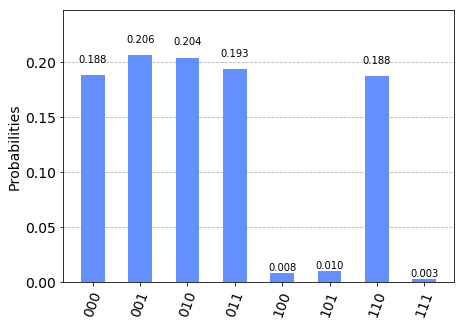

In [100]:
aer_sim = Aer.get_backend('aer_simulator')
transpiled_grover_circuit = transpile(grover_circuit, aer_sim)
qobj = assemble(transpiled_grover_circuit)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)